<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/Codes/NN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(0)

In [3]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [5]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


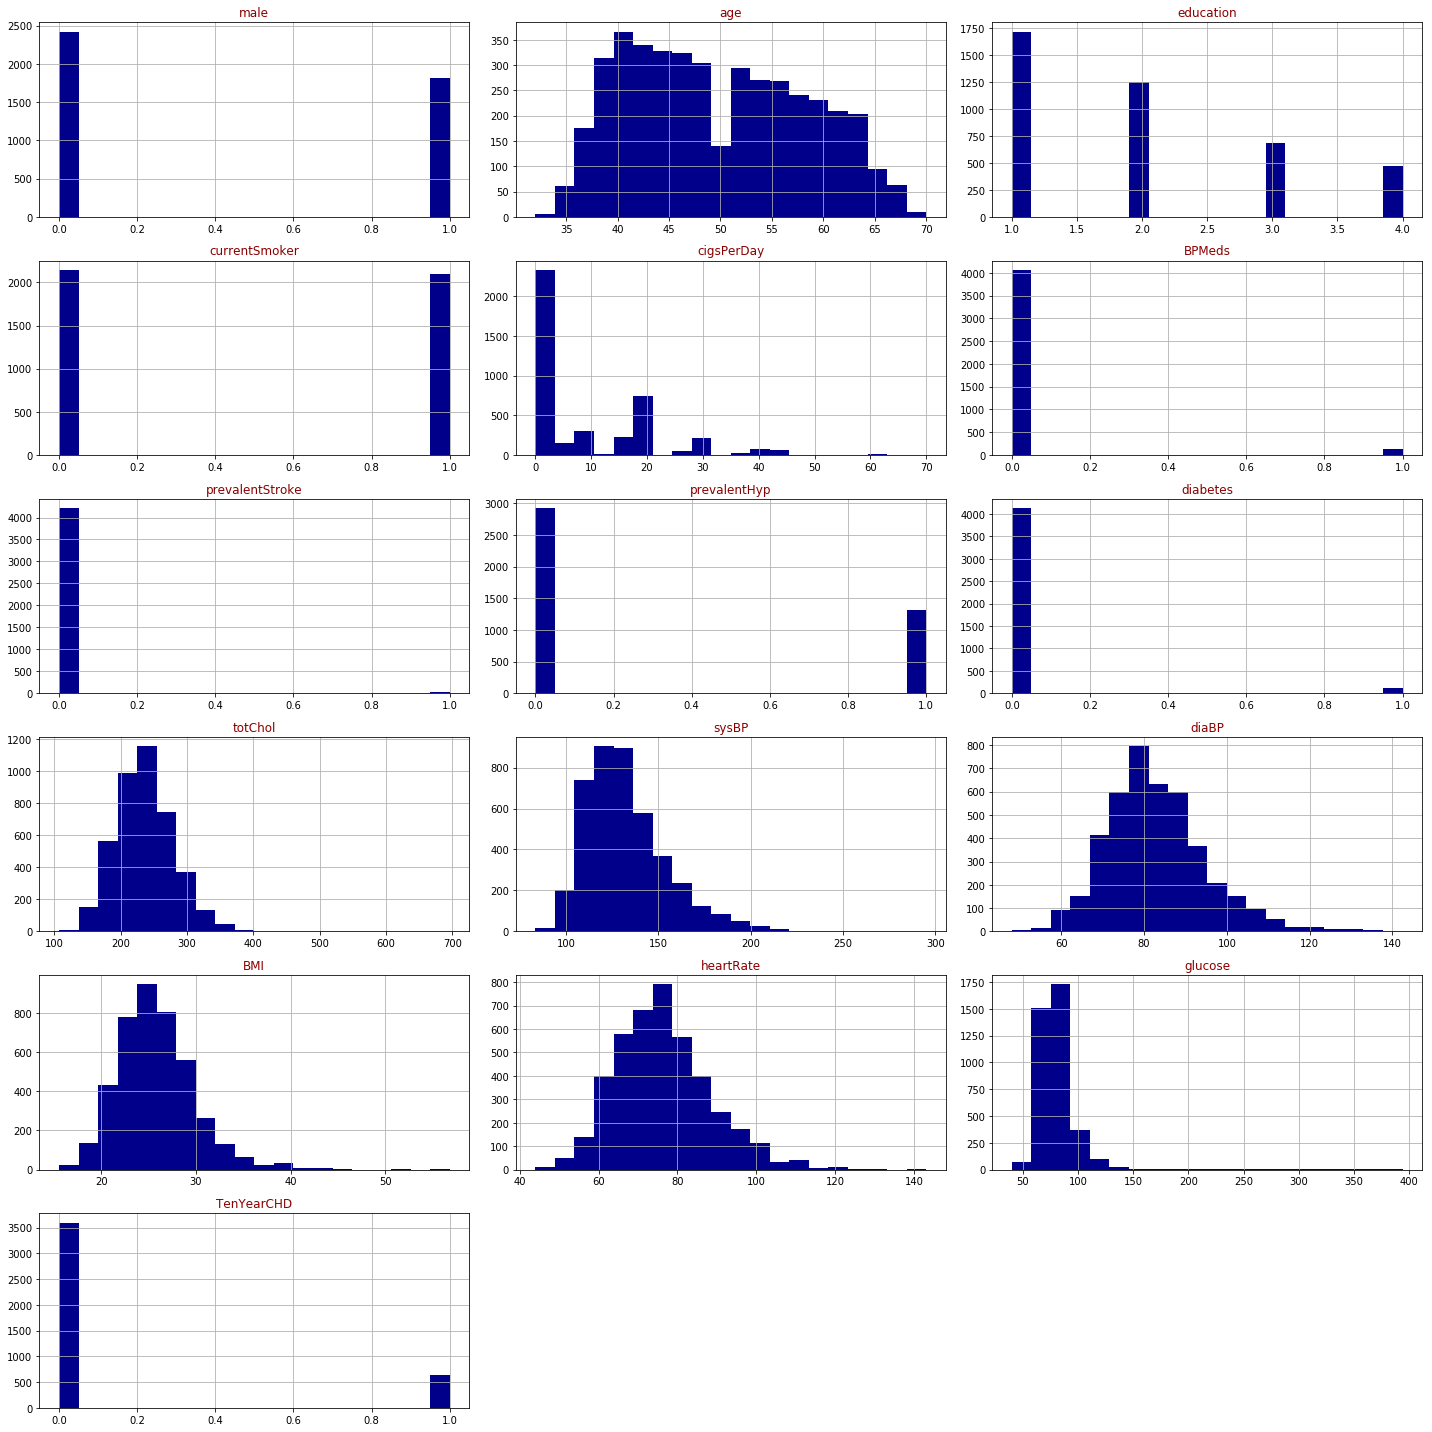

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

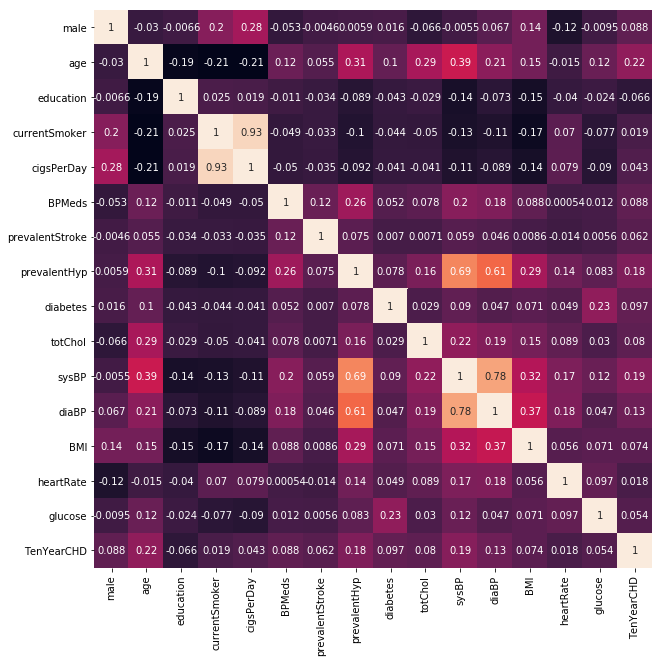

In [7]:
corr = hd.corr(method = 'spearman')
plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


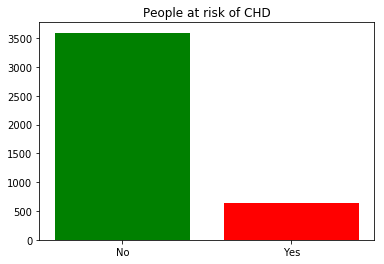

In [8]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [9]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


In [10]:
hd.drop(['education'], axis = 1, inplace = True)
hd.dropna(axis = 0, inplace = True)
hd.shape

(3751, 15)

In [11]:
hd_ = hd.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'], 
                    5, 
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['glucose'] = pd.cut(hd_['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
hd_['age'] = hd_['age'].apply(lambda x: x*0.2)
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))
hd_['BPMeds'] = hd_['BPMeds'].apply(lambda x: int(x))
hd_.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.2,0,0.16,0,0,0,0,0.15,0.2,0.25,0.3,0.38,0.13,0
1,0,0.4,0,0.16,0,0,0,0,0.31,0.2,0.38,0.4,0.62,0.13,0
2,1,0.6,1,0.32,0,0,0,0,0.23,0.3,0.38,0.3,0.38,0.13,0
3,0,0.8,1,0.48,0,0,1,0,0.23,0.4,0.50,0.4,0.25,0.20,1
4,0,0.4,1,0.32,0,0,0,0,0.31,0.3,0.50,0.2,0.50,0.13,0
5,0,0.4,0,0.16,0,0,1,0,0.23,0.5,0.75,0.4,0.38,0.20,0
6,0,1.0,0,0.16,0,0,0,0,0.23,0.3,0.25,0.5,0.25,0.13,1
7,0,0.4,1,0.32,0,0,0,0,0.39,0.1,0.25,0.2,0.38,0.13,0
8,1,0.6,0,0.16,0,0,1,0,0.31,0.3,0.50,0.3,0.38,0.13,0
9,1,0.4,1,0.48,0,0,1,0,0.23,0.4,0.62,0.2,0.50,0.20,0


In [0]:
attrib = hd_.iloc[:, :-1]
lab = hd_.iloc[:, -1]
hdy = hd_[hd_['TenYearCHD'] == 1]
hdn = hd_[hd_['TenYearCHD'] == 0]

In [0]:
hdy = hdy.sample(frac = 1).reset_index(drop = True)
hdn = hdn.sample(frac = 1).reset_index(drop = True)
sample_y = hdy.iloc[:550]
sample_n = hdn.iloc[:800]
train_data = pd.concat([sample_y, sample_n])
train_data = train_data.sample(frac = 1).reset_index(drop = True)
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [0]:
hdy = hdy.sample(frac = 1).reset_index(drop = True)
hdn = hdn.sample(frac = 1).reset_index(drop = True)
sample_y = hdy.iloc[:100]
sample_n = hdn.iloc[:175]
test_data = pd.concat([sample_y, sample_n])
test_data = test_data.sample(frac = 1).reset_index(drop = True)
x_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [15]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01))) 
                #kernel_regularizer = regularizers.l1(0.01)))
                #bias_regularizer = regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
                #kernel_regularizer = regularizers.l1(0.01))) 
                #bias_regularizer = regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
                #kernel_regularizer = regularizers.l1(0.001))) 
                #bias_regularizer = regularizers.l1(0.001)))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [16]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
__________

In [0]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_acc'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['acc'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [0]:
def plots(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Instructions for updating:
Use tf.cast instead.
Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 2s 2ms/step - loss: 39.9270 - acc: 0.4397 - val_loss: 24.7169 - val_acc: 0.4083
Epoch 2/50
1012/1012 [==============================] - 0s 242us/step - loss: 21.5255 - acc: 0.4200 - val_loss: 15.7175 - val_acc: 0.3728
Epoch 3/50
1012/1012 [==============================] - 0s 241us/step - loss: 15.5887 - acc: 0.4012 - val_loss: 13.2109 - val_acc: 0.3817
Epoch 4/50
1012/1012 [==============================] - 0s 254us/step - loss: 13.7670 - acc: 0.3883 - val_loss: 12.2701 - val_acc: 0.3728
Epoch 5/50
1012/1012 [==============================] - 0s 242us/step - loss: 12.9924 - acc: 0.4051 - val_loss: 11.8423 - val_acc: 0.3757
Epoch 6/50
1012/1012 [==============================] - 0s 239us/step - loss: 12.5948 - acc: 0.3874 - val_loss: 11.5183 - val_acc: 0.3728
Epoch 7/50
1012/1012 [==============================] - 0s 246us/step - loss: 1

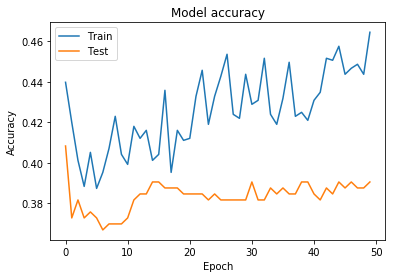

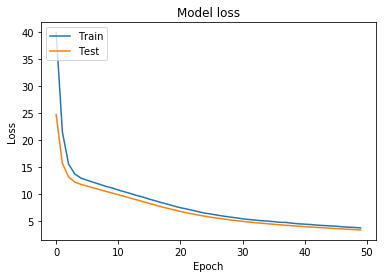

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 220us/step - loss: 3.7735 - acc: 0.4476 - val_loss: 3.3788 - val_acc: 0.3905
Epoch 2/50
1012/1012 [==============================] - 0s 216us/step - loss: 3.7075 - acc: 0.4180 - val_loss: 3.3214 - val_acc: 0.3876
Epoch 3/50
1012/1012 [==============================] - 0s 223us/step - loss: 3.6548 - acc: 0.4773 - val_loss: 3.2682 - val_acc: 0.3876
Epoch 4/50
1012/1012 [==============================] - 0s 223us/step - loss: 3.6083 - acc: 0.4476 - val_loss: 3.2165 - val_acc: 0.3876
Epoch 5/50
1012/1012 [==============================] - 0s 224us/step - loss: 3.5271 - acc: 0.4634 - val_loss: 3.1672 - val_acc: 0.3905
Epoch 6/50
1012/1012 [==============================] - 0s 213us/step - loss: 3.4642 - acc: 0.4654 - val_loss: 3.1214 - val_acc: 0.3905
Epoch 7/50
1012/1012 [==============================] - 0s 216us/step - loss: 3.4272 - acc: 0.4733 - val_loss: 3.0800 - val_acc: 0.3905
E

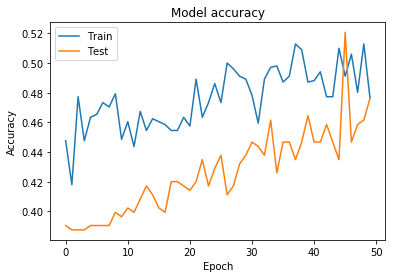

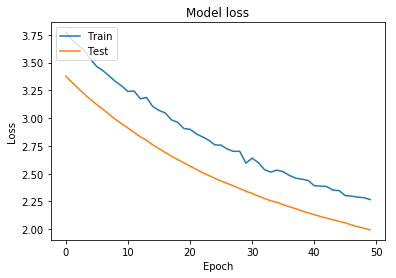

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 214us/step - loss: 2.2148 - acc: 0.4802 - val_loss: 1.9818 - val_acc: 0.4615
Epoch 2/50
1012/1012 [==============================] - 0s 220us/step - loss: 2.2208 - acc: 0.4832 - val_loss: 1.9669 - val_acc: 0.4941
Epoch 3/50
1012/1012 [==============================] - 0s 220us/step - loss: 2.2292 - acc: 0.5336 - val_loss: 1.9555 - val_acc: 0.5059
Epoch 4/50
1012/1012 [==============================] - 0s 217us/step - loss: 2.1812 - acc: 0.5040 - val_loss: 1.9418 - val_acc: 0.5059
Epoch 5/50
1012/1012 [==============================] - 0s 213us/step - loss: 2.2077 - acc: 0.5217 - val_loss: 1.9316 - val_acc: 0.4645
Epoch 6/50
1012/1012 [==============================] - 0s 211us/step - loss: 2.1880 - acc: 0.5059 - val_loss: 1.9191 - val_acc: 0.4941
Epoch 7/50
1012/1012 [==============================] - 0s 229us/step - loss: 2.1494 - acc: 0.5405 - val_loss: 1.9091 - val_acc: 0.4645
E

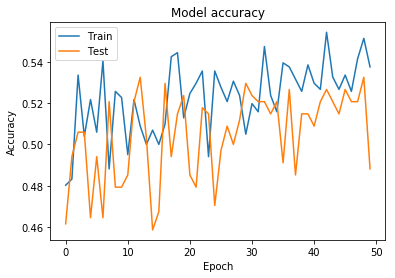

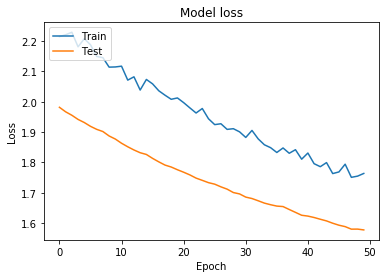

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 227us/step - loss: 1.7522 - acc: 0.5267 - val_loss: 1.5655 - val_acc: 0.5207
Epoch 2/50
1012/1012 [==============================] - 0s 223us/step - loss: 1.7311 - acc: 0.5257 - val_loss: 1.5593 - val_acc: 0.5237
Epoch 3/50
1012/1012 [==============================] - 0s 212us/step - loss: 1.7138 - acc: 0.5672 - val_loss: 1.5542 - val_acc: 0.5296
Epoch 4/50
1012/1012 [==============================] - 0s 214us/step - loss: 1.7373 - acc: 0.5464 - val_loss: 1.5534 - val_acc: 0.5059
Epoch 5/50
1012/1012 [==============================] - 0s 208us/step - loss: 1.7051 - acc: 0.5356 - val_loss: 1.5446 - val_acc: 0.5296
Epoch 6/50
1012/1012 [==============================] - 0s 223us/step - loss: 1.7044 - acc: 0.5840 - val_loss: 1.5421 - val_acc: 0.5178
Epoch 7/50
1012/1012 [==============================] - 0s 211us/step - loss: 1.7018 - acc: 0.5020 - val_loss: 1.5331 - val_acc: 0.5385
E

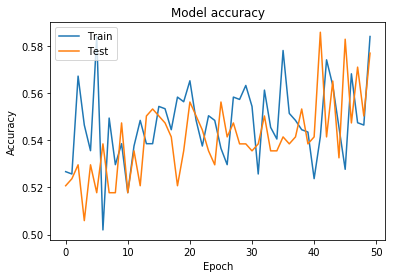

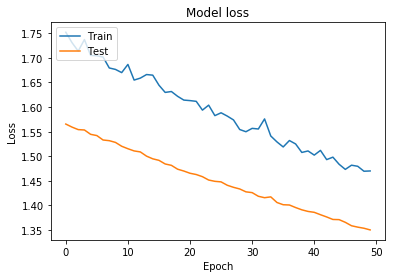

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 246us/step - loss: 1.4598 - acc: 0.5593 - val_loss: 1.3458 - val_acc: 0.5414
Epoch 2/50
1012/1012 [==============================] - 0s 208us/step - loss: 1.4598 - acc: 0.5336 - val_loss: 1.3434 - val_acc: 0.5385
Epoch 3/50
1012/1012 [==============================] - 0s 208us/step - loss: 1.4360 - acc: 0.5731 - val_loss: 1.3372 - val_acc: 0.5917
Epoch 4/50
1012/1012 [==============================] - 0s 212us/step - loss: 1.4449 - acc: 0.5711 - val_loss: 1.3350 - val_acc: 0.5414
Epoch 5/50
1012/1012 [==============================] - 0s 220us/step - loss: 1.4367 - acc: 0.5692 - val_loss: 1.3282 - val_acc: 0.5533
Epoch 6/50
1012/1012 [==============================] - 0s 212us/step - loss: 1.4170 - acc: 0.5870 - val_loss: 1.3245 - val_acc: 0.5414
Epoch 7/50
1012/1012 [==============================] - 0s 218us/step - loss: 1.4248 - acc: 0.5731 - val_loss: 1.3210 - val_acc: 0.5414
E

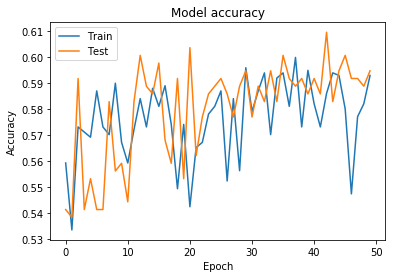

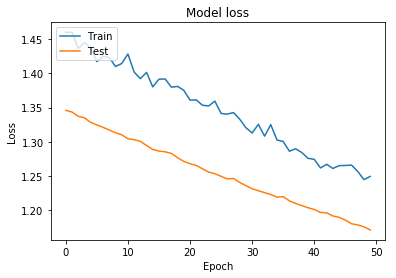

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 233us/step - loss: 1.2497 - acc: 0.6008 - val_loss: 1.1712 - val_acc: 0.5947
Epoch 2/50
1012/1012 [==============================] - 0s 206us/step - loss: 1.2373 - acc: 0.5721 - val_loss: 1.1670 - val_acc: 0.5976
Epoch 3/50
1012/1012 [==============================] - 0s 211us/step - loss: 1.2238 - acc: 0.6196 - val_loss: 1.1630 - val_acc: 0.5947
Epoch 4/50
1012/1012 [==============================] - 0s 212us/step - loss: 1.2255 - acc: 0.5820 - val_loss: 1.1609 - val_acc: 0.5947
Epoch 5/50
1012/1012 [==============================] - 0s 228us/step - loss: 1.2148 - acc: 0.5998 - val_loss: 1.1582 - val_acc: 0.6036
Epoch 6/50
1012/1012 [==============================] - 0s 212us/step - loss: 1.2086 - acc: 0.5939 - val_loss: 1.1545 - val_acc: 0.5976
Epoch 7/50
1012/1012 [==============================] - 0s 209us/step - loss: 1.2154 - acc: 0.5899 - val_loss: 1.1526 - val_acc: 0.5917
E

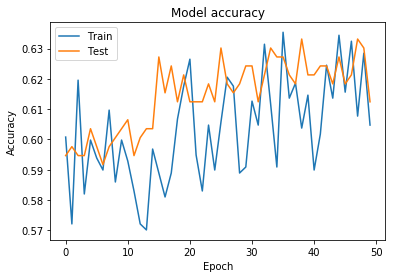

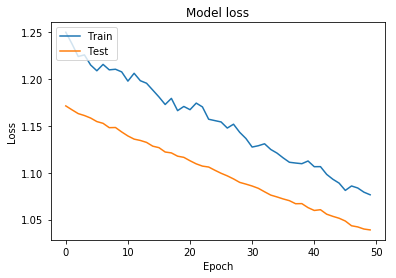

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 224us/step - loss: 1.0688 - acc: 0.5919 - val_loss: 1.0358 - val_acc: 0.6154
Epoch 2/50
1012/1012 [==============================] - 0s 212us/step - loss: 1.0706 - acc: 0.5998 - val_loss: 1.0336 - val_acc: 0.6302
Epoch 3/50
1012/1012 [==============================] - 0s 212us/step - loss: 1.0684 - acc: 0.6077 - val_loss: 1.0308 - val_acc: 0.6272
Epoch 4/50
1012/1012 [==============================] - 0s 221us/step - loss: 1.0664 - acc: 0.6324 - val_loss: 1.0278 - val_acc: 0.6272
Epoch 5/50
1012/1012 [==============================] - 0s 213us/step - loss: 1.0713 - acc: 0.6057 - val_loss: 1.0256 - val_acc: 0.6095
Epoch 6/50
1012/1012 [==============================] - 0s 211us/step - loss: 1.0632 - acc: 0.6383 - val_loss: 1.0227 - val_acc: 0.6213
Epoch 7/50
1012/1012 [==============================] - 0s 213us/step - loss: 1.0621 - acc: 0.6344 - val_loss: 1.0198 - val_acc: 0.6243
E

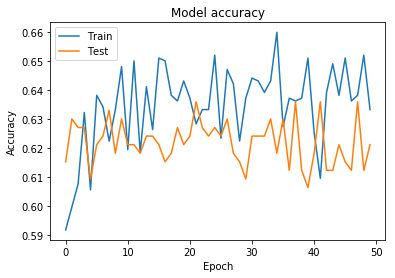

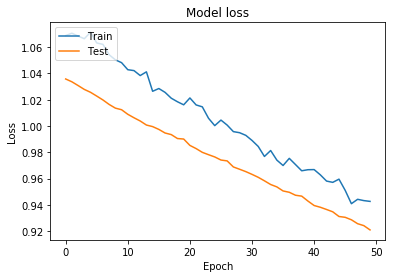

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 245us/step - loss: 0.9344 - acc: 0.6512 - val_loss: 0.9195 - val_acc: 0.6302
Epoch 2/50
1012/1012 [==============================] - 0s 255us/step - loss: 0.9369 - acc: 0.6364 - val_loss: 0.9180 - val_acc: 0.6213
Epoch 3/50
1012/1012 [==============================] - 0s 238us/step - loss: 0.9397 - acc: 0.6304 - val_loss: 0.9156 - val_acc: 0.6154
Epoch 4/50
1012/1012 [==============================] - 0s 237us/step - loss: 0.9349 - acc: 0.6275 - val_loss: 0.9147 - val_acc: 0.6302
Epoch 5/50
1012/1012 [==============================] - 0s 238us/step - loss: 0.9308 - acc: 0.6403 - val_loss: 0.9124 - val_acc: 0.6213
Epoch 6/50
1012/1012 [==============================] - 0s 237us/step - loss: 0.9293 - acc: 0.6255 - val_loss: 0.9093 - val_acc: 0.6361
Epoch 7/50
1012/1012 [==============================] - 0s 244us/step - loss: 0.9288 - acc: 0.6265 - val_loss: 0.9086 - val_acc: 0.6420
E

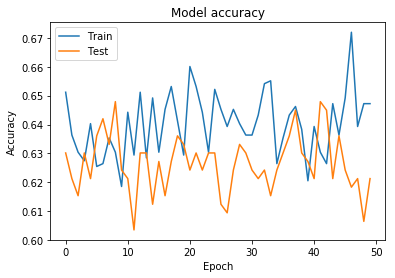

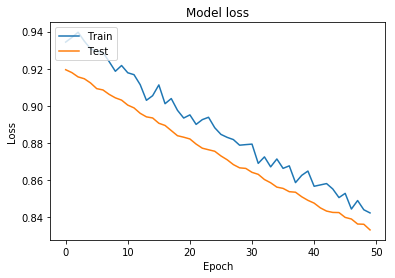

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 234us/step - loss: 0.8377 - acc: 0.6492 - val_loss: 0.8335 - val_acc: 0.6243
Epoch 2/50
1012/1012 [==============================] - 0s 221us/step - loss: 0.8415 - acc: 0.6334 - val_loss: 0.8305 - val_acc: 0.6183
Epoch 3/50
1012/1012 [==============================] - 0s 209us/step - loss: 0.8360 - acc: 0.6364 - val_loss: 0.8281 - val_acc: 0.6243
Epoch 4/50
1012/1012 [==============================] - 0s 208us/step - loss: 0.8334 - acc: 0.6403 - val_loss: 0.8271 - val_acc: 0.6183
Epoch 5/50
1012/1012 [==============================] - 0s 212us/step - loss: 0.8318 - acc: 0.6383 - val_loss: 0.8257 - val_acc: 0.6243
Epoch 6/50
1012/1012 [==============================] - 0s 214us/step - loss: 0.8293 - acc: 0.6532 - val_loss: 0.8238 - val_acc: 0.6213
Epoch 7/50
1012/1012 [==============================] - 0s 218us/step - loss: 0.8311 - acc: 0.6472 - val_loss: 0.8227 - val_acc: 0.6272
E

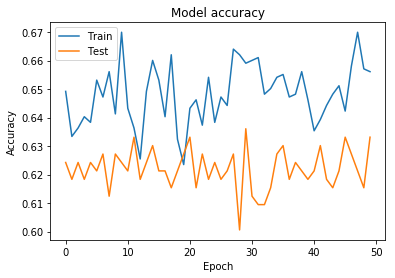

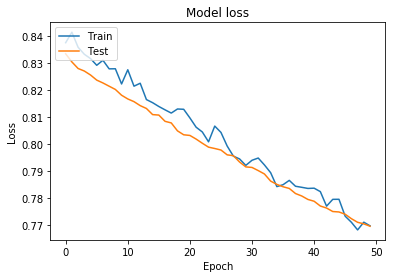

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 230us/step - loss: 0.7691 - acc: 0.6630 - val_loss: 0.7678 - val_acc: 0.6124
Epoch 2/50
1012/1012 [==============================] - 0s 211us/step - loss: 0.7690 - acc: 0.6453 - val_loss: 0.7670 - val_acc: 0.6361
Epoch 3/50
1012/1012 [==============================] - 0s 209us/step - loss: 0.7662 - acc: 0.6611 - val_loss: 0.7674 - val_acc: 0.6272
Epoch 4/50
1012/1012 [==============================] - 0s 209us/step - loss: 0.7670 - acc: 0.6581 - val_loss: 0.7657 - val_acc: 0.6243
Epoch 5/50
1012/1012 [==============================] - 0s 207us/step - loss: 0.7620 - acc: 0.6630 - val_loss: 0.7645 - val_acc: 0.6302
Epoch 6/50
1012/1012 [==============================] - 0s 243us/step - loss: 0.7642 - acc: 0.6640 - val_loss: 0.7643 - val_acc: 0.6302
Epoch 7/50
1012/1012 [==============================] - 0s 209us/step - loss: 0.7611 - acc: 0.6542 - val_loss: 0.7615 - val_acc: 0.6243
E

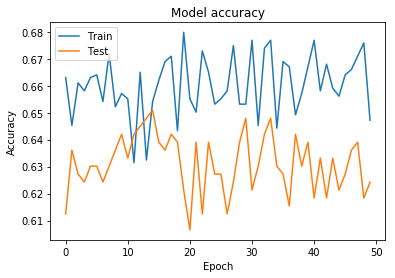

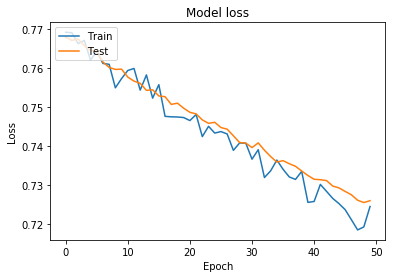

In [19]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
#n_epochs = [100, 80, 60, 40, 20]
class_weights = {0:0.8, 1:1.0}
for i in range(10):    
    history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 20, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)
    stats_avg(history, i = 50)
    plots(history)
    

In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.6763636363636364


,Predicted: 0,Predicted: 1
Actual:0,126,49
Actual:1,40,60


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       175
           1       0.55      0.60      0.57       100

   micro avg       0.68      0.68      0.68       275
   macro avg       0.65      0.66      0.66       275
weighted avg       0.68      0.68      0.68       275



In [0]:
from sklearn.model_selection import train_test_split
xt, xv, yt, yv = train_test_split(attrib, lab, test_size = 0.2, random_state = 0)

In [0]:
y_pred = model.predict(xv)
y_pred = (y_pred >= 0.5)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yv, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(yv, y_pred))
conf_matrix

Accuracy: 0.6844207723035952


,Predicted: 0,Predicted: 1
Actual:0,456,191
Actual:1,46,58


In [26]:
from sklearn.metrics import classification_report
print(classification_report(yv, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       647
           1       0.23      0.56      0.33       104

   micro avg       0.68      0.68      0.68       751
   macro avg       0.57      0.63      0.56       751
weighted avg       0.81      0.68      0.73       751

